<a href="https://colab.research.google.com/github/leogalbu/Colab_Notebook/blob/Image_Classification/Food_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Recupero il dataset

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-08-30 12:04:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 142.251.111.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   243MB/s    in 0.4s    

2022-08-30 12:04:29 (243 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
#!ls pizza_steak/train/steak

In [2]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are  {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are  2 directories and 0 images in 'pizza_steak'.
There are  2 directories and 0 images in 'pizza_steak/test'.
There are  0 directories and 250 images in 'pizza_steak/test/steak'.
There are  0 directories and 250 images in 'pizza_steak/test/pizza'.
There are  2 directories and 0 images in 'pizza_steak/train'.
There are  0 directories and 750 images in 'pizza_steak/train/steak'.
There are  0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [3]:
# Get the classnames

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
print(data_dir.glob('*'))
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

<generator object Path.glob at 0x7f52867f6450>
['pizza' 'steak']


In [4]:
# Visualize Images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set the target directory
  target_folder = target_dir + "/" + target_class
  # get random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  # Read and plot the image
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

['976382.jpg']
Image shape: (512, 512, 3)


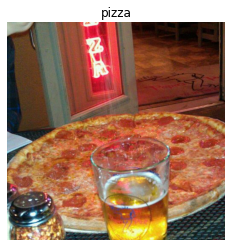

In [ ]:
img = view_random_image("pizza_steak/train", "pizza")

['482022.jpg']
Image shape: (512, 512, 3)


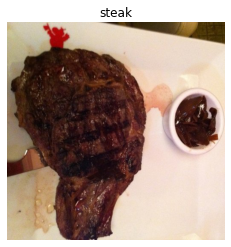

In [ ]:
img = view_random_image("pizza_steak/train", "steak")

In [ ]:
# View the image shape

img.shape # width height, colour channels

(512, 512, 3)

# End to end CNN

In [11]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocessing data (Normalize pixel value tra 0 e 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to data dir
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories
train_data = train_datagen.flow_from_directory(directory=train_dir, batch_size=32,target_size=(224,224), class_mode="binary", seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir, batch_size=32,target_size=(224,224), class_mode="binary", seed=42)

# Build the CNN Model (Tiny VGG)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

# Compile CNN
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
)

history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch = len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 231ms/step - loss: 0.5860 - accuracy: 0.6920 - val_loss: 0.3987 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4285 - accuracy: 0.8107 - val_loss: 0.3469 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3967 - accuracy: 0.8193 - val_loss: 0.3058 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 11s 238ms/step - loss: 0.3603 - accuracy: 0.8487 - val_loss: 0.3737 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 11s 225ms/step - loss: 0.3146 - accuracy: 0.8740 - val_loss: 0.3042 - val_accuracy: 0.8800


In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

## Use a NON CNN Model

In [ ]:
# set random seed
tf.random.set_seed(42)
# create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Compile
model_2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
# Fit the model
history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 186ms/step - loss: 0.9023 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
# set random seed
tf.random.set_seed(42)
# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Compile
model_3.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
# Fit the model
history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 189ms/step - loss: 3.8355 - accuracy: 0.6087 - val_loss: 0.6415 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.7084 - accuracy: 0.7067 - val_loss: 0.5015 - val_accuracy: 0.7580
Epoch 3/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6586 - accuracy: 0.7273 - val_loss: 1.3514 - val_accuracy: 0.5200
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.6773 - accuracy: 0.7180 - val_loss: 0.5198 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6360 - accuracy: 0.7300 - val_loss: 0.4602 - val_accuracy: 0.7860


In [ ]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_14 (Dense)            (None, 100)               15052900  
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Understanding CNN Model

## Binary Classification

['2435316.jpg']
Image shape: (384, 512, 3)
['3314176.jpg']
Image shape: (512, 512, 3)


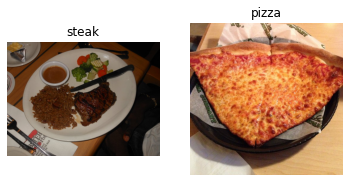

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train', 'steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train', 'pizza')

In [ ]:
# Prepare the data (Preprocess)

# Define dir dataset paths

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'


## Turn data into batches (small subset of data) to much image might not fit into the memory of the processor


In [12]:
# Create train and test data generators and rescale the data
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [13]:
# Load image from dir and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, target_size=(224,224), class_mode='binary', batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir, target_size=(224,224), class_mode='binary', batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# get a sample of train data batch
images, labels = train_data.next()
len(images), len(labels) # 32 immagini e 32 label (batch_size)

(32, 32)

In [ ]:
# number of batches =====>  47 Batches (1500 total images / 32 batch size)
len(train_data)

47

In [ ]:
# Get the images
# images[2:,], images[0].shape

In [ ]:
# Labels (0 e 1, classificazione binaria)
labels

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.],
      dtype=float32)

## Create a Baseline Model

Simple model to setup when beginning a ML experiment.

In [14]:
# Import 
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from keras import Sequential

In [ ]:
# Create a simple model (Baseline)
model_3 = Sequential([
    Conv2D(filters=10, input_shape=(224,224,3), kernel_size=3, padding='valid', strides=1, activation='relu'), # Input Layer
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # Output layer (1 = binary classification)
])

In [ ]:
# Compile the model
model_3.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
# Fit the model
history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 303ms/step - loss: 0.7158 - accuracy: 0.7067 - val_loss: 0.4272 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 10s 207ms/step - loss: 0.4332 - accuracy: 0.8120 - val_loss: 0.4239 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.3463 - accuracy: 0.8653 - val_loss: 0.4245 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.1731 - accuracy: 0.9440 - val_loss: 0.4043 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.0417 - accuracy: 0.9913 - val_loss: 0.5442 - val_accuracy: 0.7940


## Evaluate the model

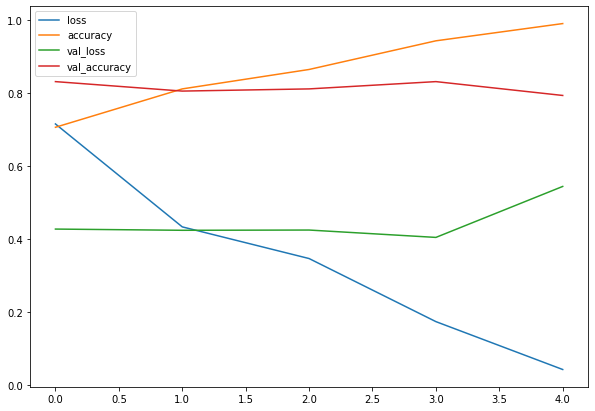

In [ ]:
## Check the training curves
import  pandas as pd
pd.DataFrame(history_3.history).plot(figsize=(10,7))

In [15]:
# Plot Validation and training curves separately

def plot_loss_curve(history):
  """ 
  Return loss curves for training and validation metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss'])) # number of epochs

  # Plot loos
  plt.plot(epochs, loss, label='training loss')
  plt.plot(epochs, val_loss, label='val loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()
  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training accuracy')
  plt.plot(epochs, val_accuracy, label='val accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

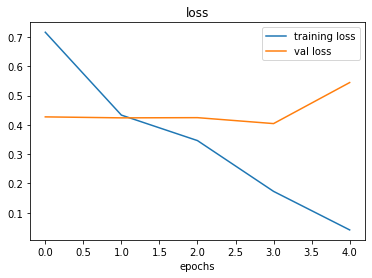

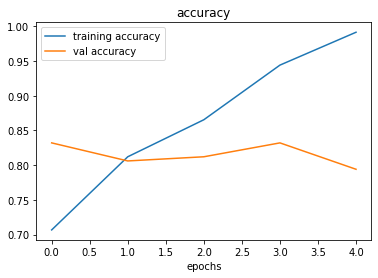

In [ ]:
plot_loss_curve(history_3)

> # Validation loss incresing mean that the model is overfitting

## Adjust the model parameters

- Create a basaline model
- beat the beaselin by overfitting
- reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the nubmer of conv filters
* Add another dense layer to the output of the flattened layer

Reduce Overfitting

* Add Data augmentation
* Regularization layers (MaxPool2D)
* Add more data
* Dropout


In [ ]:
# Create the model (new baseline with max pool)
model_4 = Sequential([
    Conv2D(10,3, input_shape=(224,224,3), activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model_4.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,epochs=5,steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 189ms/step - loss: 0.6371 - accuracy: 0.6233 - val_loss: 0.5133 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4899 - accuracy: 0.7720 - val_loss: 0.4450 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4563 - accuracy: 0.7987 - val_loss: 0.3924 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.4116 - accuracy: 0.8180 - val_loss: 0.3555 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 11s 230ms/step - loss: 0.4010 - accuracy: 0.8200 - val_loss: 0.3370 - val_accuracy: 0.8520


In [ ]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 10)      

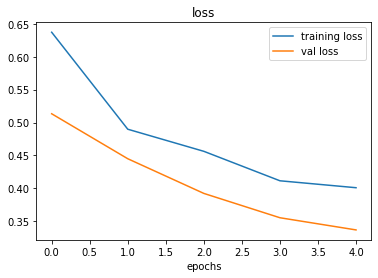

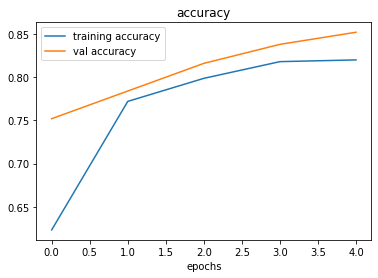

In [ ]:
# Plot trianing curves
plot_loss_curve(history_4)

## Data Agumentation

In [16]:
# Create ImageDataGenerator training instances with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255., rotation_range=0.2, shear_range=0.2,zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.3, horizontal_flip=True)
# create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
# test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

## Visualize Data Augmentation

In [17]:
# Import data and augment it from training dir
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode='binary', shuffle=False)
# Create non agumented
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode='binary', shuffle=False)
# Test Data
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# get sample augmentated data
images, labels =  train_data.next()
agumented_images, augmented_labels = train_data_augmented.next()wq

Showing image number: 5


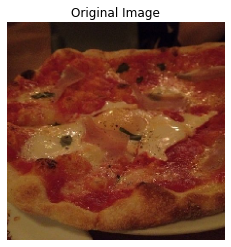

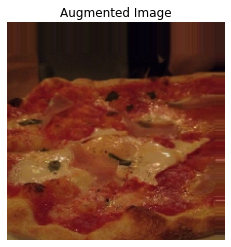

In [ ]:
# Show original image and the aumented one
random_number = random.randint(0,32) # batch sizes are 32
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False);
plt.figure()
plt.imshow(agumented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False);

## Create model with augmented training data

In [18]:
# Import data and augment it from training dir (Shuffle True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode='binary', shuffle=True)
# Create non agumented
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode='binary', shuffle=True)
# Test Data
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [19]:
# Create the model (same as model_4)
model_5 = Sequential([
    Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    # Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [20]:
# Compile the model
model_5.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [21]:
# Fit the model
history_5 = model_5.fit(train_data_augmented, steps_per_epoch=len(train_data_augmented), epochs=5, validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 543ms/step - loss: 0.6664 - accuracy: 0.6267 - val_loss: 0.5095 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 22s 465ms/step - loss: 0.5458 - accuracy: 0.7233 - val_loss: 0.3836 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 22s 470ms/step - loss: 0.5108 - accuracy: 0.7540 - val_loss: 0.3710 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 28s 595ms/step - loss: 0.5085 - accuracy: 0.7633 - val_loss: 0.3457 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 22s 466ms/step - loss: 0.4750 - accuracy: 0.7793 - val_loss: 0.4444 - val_accuracy: 0.7840


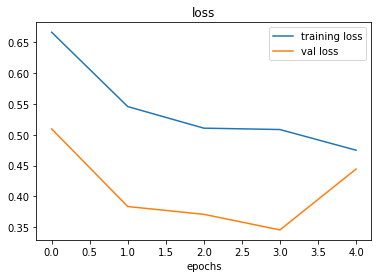

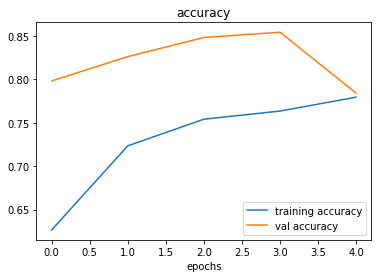

In [22]:
# Plot loss curves
plot_loss_curve(history_5)

## Repeat until satisfied (improve performance)

* increase the numbers of model layers (more Conv2D/MaxPool2D)
* Increase the numbers of hidden units in each conv layer
* Training for longer time (more epochs)
* Find and ideal learning rate
* Get more data xD
* Use **transer learning**

> Recreate the model on the CNN explainier and se how it performs on the auugmented training data

In [92]:
from keras.layers import Dropout
model_6 = Sequential([
    Conv2D(32,3, input_shape=(224,224,3), activation='relu'),
    MaxPool2D(2),
    Conv2D(64,3, activation='relu'),
    MaxPool2D(2),
    Dropout(0.2),
    Conv2D(128, 3, activation='relu'),
    MaxPool2D(2),
    Dropout(0.2),
    Conv2D(256, 3, activation='relu'),
    MaxPool2D(2),
    Dropout(0.2),
    Flatten(),
    Dense(512, activantion='relu'),
    Dense(1, activation='sigmoid')
])

In [24]:
train_data_gen_aug = ImageDataGenerator(rescale=1/255., rotation_range=40, width_shift_range=0.2, height_shift_range=0.3, fill_mode='nearest',horizontal_flip=True)
test_data_gen = ImageDataGenerator(rescale=1/255.) 

In [25]:
train_data = train_data_gen_aug.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode='binary')
test_data = test_data_gen.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [93]:
model_6.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adam())

In [94]:
history_6 = model_6.fit(train_data, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data), epochs=10)

Epoch 1/10
47/47 [==============================] - 24s 497ms/step - loss: 1.0376 - accuracy: 0.5220 - val_loss: 0.6763 - val_accuracy: 0.5080
Epoch 2/10
47/47 [==============================] - 23s 492ms/step - loss: 0.6664 - accuracy: 0.5880 - val_loss: 0.5954 - val_accuracy: 0.6860
Epoch 3/10
47/47 [==============================] - 23s 492ms/step - loss: 0.6090 - accuracy: 0.6793 - val_loss: 0.4862 - val_accuracy: 0.7880
Epoch 4/10
47/47 [==============================] - 23s 491ms/step - loss: 0.5812 - accuracy: 0.7200 - val_loss: 0.4407 - val_accuracy: 0.8340
Epoch 5/10
47/47 [==============================] - 23s 491ms/step - loss: 0.5648 - accuracy: 0.7140 - val_loss: 0.4802 - val_accuracy: 0.8100
Epoch 6/10
47/47 [==============================] - 23s 488ms/step - loss: 0.5583 - accuracy: 0.7067 - val_loss: 0.4280 - val_accuracy: 0.8380
Epoch 7/10
47/47 [==============================] - 23s 491ms/step - loss: 0.5159 - accuracy: 0.7560 - val_loss: 0.3955 - val_accuracy: 0.8460

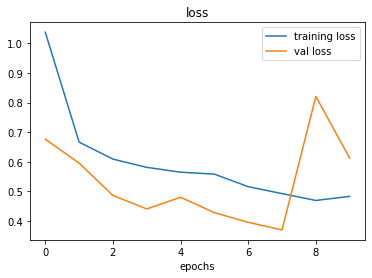

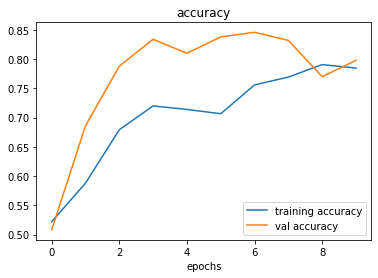

In [95]:
plot_loss_curve(history_6)

## Make prediction on custom data

In [29]:
print(class_names) 

['pizza' 'steak']


In [31]:
# View example images
! wget https://raw.githubusercontent.com/mrdbourke/nutrify/main/images/sample-food-images/steak.jpeg
steak = mpimg.imread('steak.jpeg')

--2022-08-30 12:38:14--  https://raw.githubusercontent.com/mrdbourke/nutrify/main/images/sample-food-images/steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘steak.jpeg.1’

steak.jpeg.1        100%[===================>]   1.89M  --.-KB/s    in 0.08s   

2022-08-30 12:38:14 (24.1 MB/s) - ‘steak.jpeg.1’ saved [1978213/1978213]



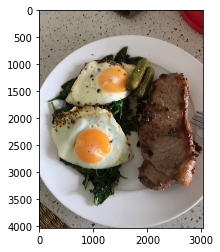

In [33]:
plt.imshow(steak)

In [34]:
steak.shape

(4032, 3024, 3)

## Preprocess custom images

To make a prediction on custom data it's important to preprocess into the same format as the data of the model was trained on

In [38]:
# helper function to preprocess images (import and resize)
def load_and_prep(filename, image_shape=224):
  """
  Read an image from filename, turn it into a tensor and reshape it to image_shape
  """
  # Rad in the image
  img = tf.io.read_file(filename)
  # Decode the file into a tensor
  img = tf.io.decode_image(img)
  # Resize it
  img = tf.image.resize(img, [image_shape,image_shape])
  # Rescale the image
  img = img/255.
  return img


In [39]:
# load and preprocess custom image
steak = load_and_prep('steak.jpeg')

In [49]:
# predict expand dims serve per aggiungere la quarta dimensione che si apsetta il modello (BATCH SIZE)
pred = model_6.predict(tf.expand_dims(steak, axis=0))

In [52]:
# We can index the predicted class by rounding the prediction probability and indexing it on class name
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [54]:
def pred_and_plot(model,filename, class_names=class_names):
  img = load_and_prep(filename)

  pred = model_6.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False)

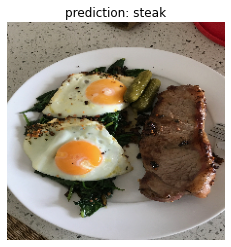

In [55]:
pred_and_plot(model_6, 'steak.jpeg')

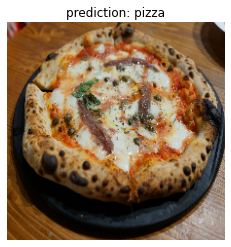

In [82]:
pred_and_plot(model_6, 'pizza-napoli.jpg')

InvalidArgumentError: ignored

In [ ]:
# load and preprocess custom image
steak = load_and_prep('steak.jpeg')